<a href="https://colab.research.google.com/github/rmwaura/Back-end/blob/main/stroke_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prediction of Stroke**

**In this study, I explore the factors that influence stroke occurrences and employ machine learning techniques to predict stroke risks**.

This dataset is used to predict whether a patient is likely to have a stroke based on input parameters such as:

*   Gender
*   Age
*   Heart diseases
*   Smoking Status
*   Working status
*   Ever married
*   BMI




**age:** This is the age of the patient. Age is a crucial factor in stroke prediction as the risk of stroke increases with age. According to the World Health Organization, the risk of stroke doubles every decade after the age of 55. 🌡️👴

**hypertension:** This is a binary feature indicating whether the patient has hypertension (high blood pressure) or not. Hypertension is a significant risk factor for stroke as it can damage blood vessels, making them prone to blockage or rupture. 💉🩺

**heart_disease:** This binary feature indicates whether the patient has heart disease or not. Patients with heart diseases are at a higher risk of stroke as these conditions can lead to the formation of clots in the heart that can travel to the brain. ❤️💔

**ever_married:** This feature represents whether the patient is married or not. Although not a direct risk factor for stroke, marital status can be associated with lifestyle factors that influence stroke risk. For instance, married individuals might have different stress levels, physical activity patterns, or dietary habits compared to their unmarried counterparts. 💍👫

**work_type:** This categorical feature describes the type of occupation of the patient. Certain occupations might be associated with higher stress levels or sedentary behavior, which can influence stroke risk. 👷‍♀️👨‍⚕️👩‍💼

**Residence_type:** This feature indicates whether the patient lives in a rural or urban area. The place of residence might be associated with stroke risk due to factors like access to healthcare, air quality, lifestyle habits, etc. 🏡🌆🌳

**avg_glucose_level:** This feature represents the average glucose level in the patient's blood. High blood glucose levels can damage blood vessels, leading to an increased risk of stroke. 🩸🍬

**bmi:** This is the Body Mass Index of the patient, calculated as weight in kilograms divided by the square of height in meters. A high BMI indicates obesity, which is a significant risk factor for stroke as it can lead to or exacerbate conditions like hypertension, high blood glucose, and heart disease. 🏋️‍♀️🍔

**smoking_status:** This categorical feature indicates whether the patient is a smoker, former smoker, or never smoked. Smoking can increase stroke risk as it can damage blood vessels, increase blood pressure, and reduce the amount of oxygen reaching the brain. 🚬🚭

**gender:** This feature represents the gender of the patient. Gender can influence stroke risk due to biological differences and gender-specific lifestyle patterns. ♀️♂️ </p>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

#importing libraries
import os
import numpy as np
import pandas as pd


# accessing directory structure
import missingno as msno
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

# modelling
from sklearn.preprocessing import (StandardScaler,
                                   LabelEncoder,
                                   OneHotEncoder)
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score,
                             auc,#
                             precision_score,
                             recall_score,
                             f1_score,
                             roc_auc_score,
                             confusion_matrix)
from sklearn.model_selection import (GridSearchCV,
                                     StratifiedKFold,
                                     cross_val_score)

# handling imbalanced dataset

from imblearn.datasets import make_imbalance
from imblearn.under_sampling import (RandomUnderSampler,
                                     ClusterCentroids,
                                     TomekLinks,
                                     NeighbourhoodCleaningRule,
                                     EditedNearestNeighbours,
                                     NearMiss)


from imblearn.over_sampling import (SMOTE,
                                    ADASYN)


# model algorithams
from sklearn.ensemble import (RandomForestClassifier,
                              AdaBoostClassifier,
                              GradientBoostingClassifier)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

**Import Data**

In [ ]:
#importing data
df=pd.read_csv("/content/stroke_prediction/stroke_dataset.csv")

**Exploratory Data Analysis**

In [ ]:
#printing the first 3 rows of the dataset
df.head(3)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1


In [ ]:
# display the number of entries, the number and names of the column attributes, the data type and
    # digit placings, and the memory space used
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
df2 = df.copy()

In [ ]:
#show the distribution of stroke status in a pie chart
df2['stroke'] = df2['stroke'].replace({1: 'Yes', 0: 'No'})
stroke_counts = df2['stroke'].value_counts().reset_index()
stroke_counts.columns = ['Stroke', 'Count']
custom_colors = ['#3d84bf', '##FF0000']
fig = px.pie(stroke_counts, names='Stroke', values='Count',
             title='Distribution of Stroke Status',
             color_discrete_sequence=custom_colors,
             hole=0.3
             )
fig.show()

ValueError: ignored

**What is the distribution of gender in the dataset and does it have any impact on the likelihood of stroke?**

In [ ]:
#show the gender ratio in a column chart
gender_counts = df2['gender'].value_counts()
custom_colors = ['#FF0000', '#000000', '#FFE4C4' ]

fig1 = px.bar(gender_counts, x=gender_counts.index, y=gender_counts.values, color=gender_counts.index,
              color_discrete_map={gender: color for gender, color in zip(gender_counts.index, custom_colors)})
fig1.update_layout(title='Gender Ratio')
fig1.show()


In [19]:
#percentage of stroke cases by gender displayed using a pie chart
gender_stroke_counts = df.groupby(['gender', 'stroke']).size().unstack()
gender_stroke_percentage = (gender_stroke_counts[1] / (gender_stroke_counts[0] + gender_stroke_counts[1])) * 100

fig = px.pie(names=gender_stroke_percentage.index, values=gender_stroke_percentage.values,
             title="Percentage of Stroke Cases by Gender",
             color_discrete_sequence=['#FFE4C4', '#FF0000'])

fig.update_traces(textinfo="percent+label", pull=[0.1, 0], marker=dict(line=dict(color="white", width=2)))
fig.show()

In [ ]:
#distribution of stroke cases across the different age groups using a bubble chart
age_stroke_counts = df2.groupby(["age", "stroke"]).size().reset_index(name="Count")
fig_bubble_age_stroke = px.scatter(age_stroke_counts, x="age", y="Count", size="Count", color="stroke",
                                   title="Distribution of Stroke Across Age Groups",
                                   labels={"age": "Age", "Count": "Count", "stroke": "Stroke"},
                                   color_discrete_sequence=['#FF0000', '#BC3030'] )

fig_bubble_age_stroke.update_layout(xaxis_title="Age", yaxis_title="Count")
fig_bubble_age_stroke.show()

In [ ]:
attrition_by_ever_married = df2.groupby("ever_married")["stroke"].value_counts(normalize=True).unstack().reset_index()
custom_colors = [ '#FF0000' , '#FF0000']

fig_pie_ever_married = px.pie(attrition_by_ever_married, values="Yes", names="ever_married", hole=0.4,
                              title="Stroke Rate by Marital Status",
                              labels={"ever_married": "Ever Married"},
                              color_discrete_map={'Yes': custom_colors[0], 'No': custom_colors[1]})
fig_pie_ever_married.update_traces(textinfo="percent+label", pull=[0.1, 0.1], showlegend=False)
fig_pie_ever_married.update_layout(annotations=[dict(text="Stroke Rate", x=0.5, y=0.5, font_size=22, showarrow=False)])

fig_pie_ever_married.show()

In [ ]:
stroke_rate_with_hypertension = (df[df['hypertension'] == 1]['stroke'].mean()) * 100
stroke_rate_without_hypertension = (df[df['hypertension'] == 0]['stroke'].mean()) * 100

data = pd.DataFrame({'Hypertension': ['With Hypertension', 'Without Hypertension'],
                     'Stroke Rate': [stroke_rate_with_hypertension, stroke_rate_without_hypertension]})
fig = px.bar(data, x='Hypertension', y='Stroke Rate',
             text='Stroke Rate', title='Stroke Rate by Hypertension',
             labels={'Hypertension': 'Hypertension Status', 'Stroke Rate': 'Stroke Rate (%)'})
fig.update_traces(marker_color=[ "#FF0000" ,  "#FFE4C4"])
fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig.show()

In [ ]:
work_stroke_rates = df.groupby("work_type")["stroke"].mean().reset_index()
colors = ['#FF0000']

fig = px.bar(work_stroke_rates, x="work_type", y="stroke",
             title="Stroke Rate by Work Type",
             labels={"work_type": "Work Type", "stroke": "Stroke Rate"},
             color_discrete_sequence=colors)

fig.update_layout(xaxis_title="Work Type", yaxis_title="Stroke Rate")
fig.show()


 **Data Preprocessing**

**Missing data**

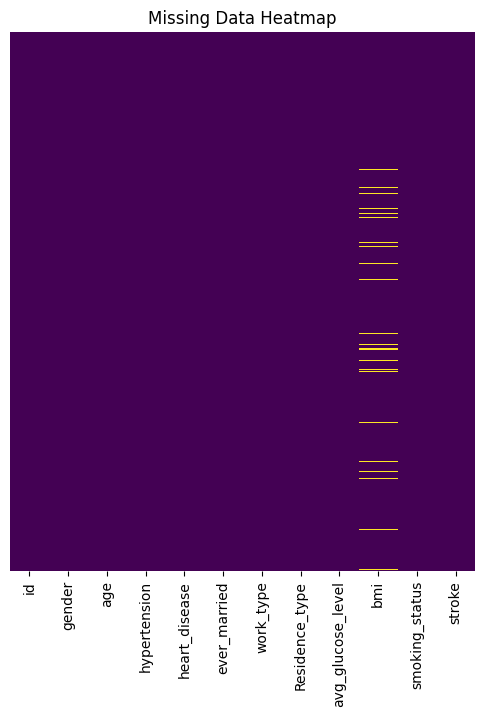

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
plt.figure(figsize=(6, 7))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Missing Data Heatmap')
plt.show()
df.isnull().sum()

In [ ]:
column_values = df['bmi'].dropna()
sampled_values = np.random.choice(column_values, size=df['bmi'].isnull().sum(), replace=True)
df.loc[df['bmi'].isnull(), 'bmi'] = sampled_values
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
df['smoking_status'].replace('Unknown', np.nan, inplace=True)

In [ ]:
custom_colors = ['#F5F5DC', '#FFE4C4', '#7FFFD4' , '#00FFFF']
fig = px.pie(df,names='smoking_status' , color_discrete_sequence=custom_colors)
fig.show()

In [ ]:
column_values = df['smoking_status'].dropna()
sampled_values = np.random.choice(column_values, size=df['smoking_status'].isnull().sum(), replace=True)
df.loc[df['smoking_status'].isnull(), 'smoking_status'] = sampled_values


In [ ]:
df.drop_duplicates()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,22.0,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,49.5,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


Category Data Encoding

In [ ]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [ ]:
df=df[(df['gender'] != 'Other')]

In [ ]:
df["gender"]=df["gender"].str.replace("Male","1")
df["gender"]=df["gender"].str.replace("Female","0")
df["gender"]=df["gender"].astype("int32")

In [ ]:
df['work_type'].value_counts()

Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [ ]:
df["ever_married"]=df["ever_married"].str.replace("Yes","1")
df["ever_married"]=df["ever_married"].str.replace("No","0")
df["ever_married"]=df["ever_married"].astype("int32")

In [ ]:
df

NameError: ignored

In [ ]:
df["Residence_type"]=df["Residence_type"].str.replace("Rural","0")
df["Residence_type"]=df["Residence_type"].str.replace("Urban","1")
df["Residence_type"]=df["Residence_type"].astype("int32")

In [ ]:
df.drop(['id'],axis=1,inplace = True)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LassoLars
from sklearn.linear_model import RidgeCV
le = preprocessing.LabelEncoder()

**Visualization of Data Balancing with Data Sampling Techniques**

In [ ]:
data_0 = df[df.iloc[:,-1]==0]
data_1 = df[df.iloc[:,-1]==1]

df['stroke'].value_counts()

NameError: ignored

In [ ]:
from sklearn.utils import resample

data_1 = resample(data_1,replace=True , n_samples=data_0.shape[0] , random_state=123 )

NameError: ignored

In [ ]:
#concatenate upsampled data
df = np.concatenate((data_0,data_1))

#create the balanced dataframe
df = pd.DataFrame(df)
df.columns = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type', 'avg_glucose_level', 'bmi','smoking_status', 'stroke']

# visualize balanced data
stroke = dict(df['stroke'].value_counts())
fig = px.pie(names = ['False','True'],values = stroke.values(),title = 'Stroke Occurance',color_discrete_sequence=px.colors.sequential.Aggrnyl)
fig.update_traces(textposition='inside', textinfo='percent+label')

In [ ]:
df_resampled = pd.get_dummies(df , columns =  ['gender','ever_married','work_type','Residence_type','smoking_status'] ,drop_first=True )

In [ ]:
x1 = df_resampled.drop('stroke', axis = 1)
y1 = pd.to_numeric( df_resampled['stroke'])

In [ ]:
scaler = StandardScaler()

x_resampled = scaler.fit_transform(x1)

In [ ]:
x_train_resampled , x_test_resampled , y_train_resampled , y_test_resampled = train_test_split(x_resampled,y1,test_size = .20)

** Modeling and Evaluations**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn .ensemble import RandomForestClassifier
from sklearn .ensemble import VotingClassifier , BaggingClassifier , StackingClassifier
# from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve
from sklearn.metrics import roc_curve, roc_auc_score

Best XGBoost Hyperparameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.9}
XGBoost Accuracy: 0.9768518518518519
XGBoost Confusion Matrix:
[[936  45]
 [  0 963]]
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98       981
           1       0.96      1.00      0.98       963

    accuracy                           0.98      1944
   macro avg       0.98      0.98      0.98      1944
weighted avg       0.98      0.98      0.98      1944

Training Accuracy: 0.9996141975308642
Testing Accuracy: 0.9768518518518519


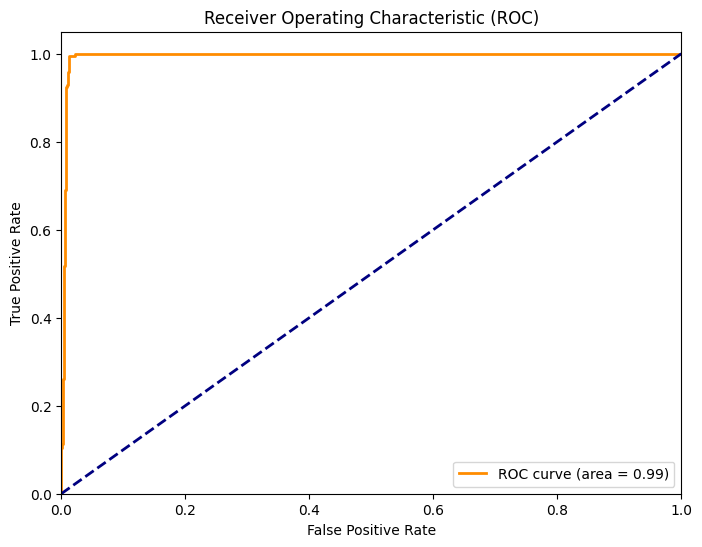

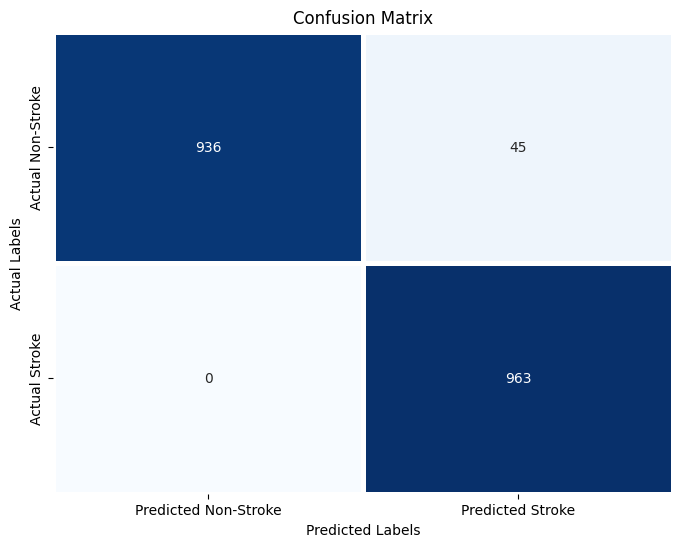

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier


param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
}


grid_search_xgb = GridSearchCV(
    estimator=XGBClassifier(random_state=42),
    param_grid=param_grid_xgb,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
)

grid_search_xgb.fit(x_train_resampled, y_train_resampled)


best_params_xgb = grid_search_xgb.best_params_

best_xgb_model = XGBClassifier(random_state=42, **best_params_xgb)
best_xgb_model.fit(x_train_resampled, y_train_resampled)


y_pred_xgb = best_xgb_model.predict(x_test_resampled)


accuracy_xgb = accuracy_score(y_test_resampled, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test_resampled, y_pred_xgb)
class_report_xgb = classification_report(y_test_resampled, y_pred_xgb)

print("Best XGBoost Hyperparameters:", best_params_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb}")
print("XGBoost Confusion Matrix:")
print(conf_matrix_xgb)
print("XGBoost Classification Report:")
print(class_report_xgb)

y_train_pred = best_xgb_model.predict(x_train_resampled)
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)

test_accuracy = accuracy_score(y_test_resampled, y_pred_xgb)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)
# ROC curve
roc_auc = roc_auc_score(y_test_resampled, best_xgb_model.predict_proba(x_test_resampled)[:, 1])
fpr, tpr, _ = roc_curve(y_test_resampled, best_xgb_model.predict_proba(x_test_resampled)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# Confusion matrix
conf_matrix_xgb = confusion_matrix(y_test_resampled, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt="d", cmap='Blues', linewidths=2.5, cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.xticks([0.5, 1.5], ['Predicted Non-Stroke', 'Predicted Stroke'])
plt.yticks([0.5, 1.5], ['Actual Non-Stroke', 'Actual Stroke'])
plt.show()

**Model 6 Using Random Forest**

Best Hyperparameters for Random Forest: {'class_weight': 'balanced', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy for Random Forest (Train): 1.0000
Accuracy for Random Forest (Test): 0.9913


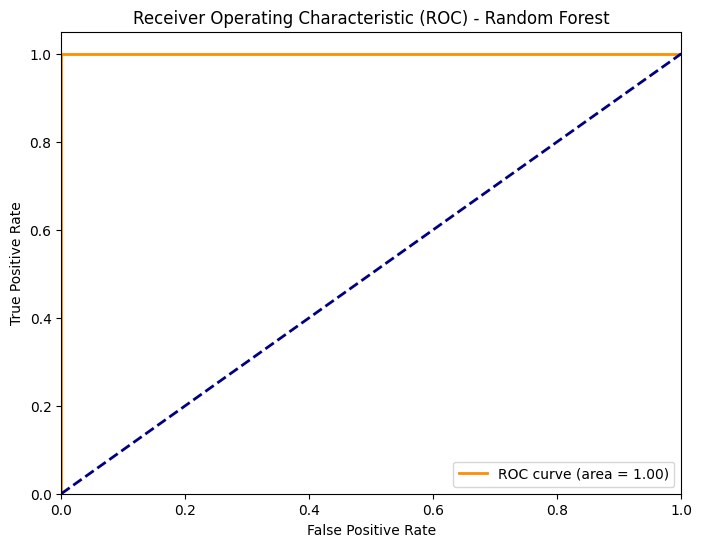

In [ ]:
from sklearn.ensemble import RandomForestClassifier

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'class_weight': ['balanced', 'balanced_subsample', None]
}

rf_classifier = RandomForestClassifier(random_state=42)

grid_search_rf = GridSearchCV(
    estimator=rf_classifier,
    param_grid=param_grid_rf,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
)

grid_search_rf.fit(x_train_resampled, y_train_resampled)

best_params_rf = grid_search_rf.best_params_

best_rf_classifier = RandomForestClassifier(random_state=42, **best_params_rf)
best_rf_classifier.fit(x_train_resampled, y_train_resampled)

y_pred_rf = best_rf_classifier.predict(x_test_resampled)

accuracy_rf_train = best_rf_classifier.score(x_train_resampled, y_train_resampled)
accuracy_rf_test = accuracy_score(y_test_resampled, y_pred_rf)
print("Best Hyperparameters for Random Forest:", best_params_rf)
print(f"Accuracy for Random Forest (Train): {accuracy_rf_train:.4f}")
print(f"Accuracy for Random Forest (Test): {accuracy_rf_test:.4f}")


 #ROC curve
roc_auc_rf = roc_auc_score(y_test_resampled, best_rf_classifier.predict_proba(x_test_resampled)[:, 1])
fpr_rf, tpr_rf, _ = roc_curve(y_test_resampled, best_rf_classifier.predict_proba(x_test_resampled)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_rf))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Random Forest')
plt.legend(loc='lower right')
plt.show()

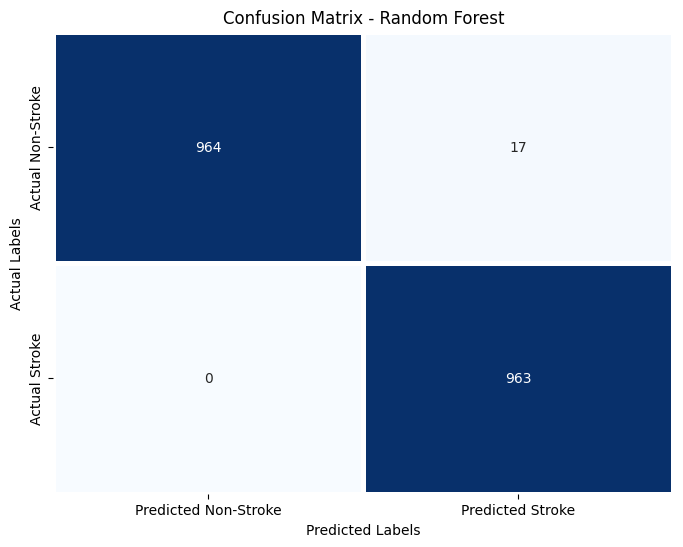

Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       981
           1       0.98      1.00      0.99       963

    accuracy                           0.99      1944
   macro avg       0.99      0.99      0.99      1944
weighted avg       0.99      0.99      0.99      1944



In [ ]:
# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test_resampled, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap='Blues', linewidths=2.5, cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix - Random Forest')
plt.xticks([0.5, 1.5], ['Predicted Non-Stroke', 'Predicted Stroke'])
plt.yticks([0.5, 1.5], ['Actual Non-Stroke', 'Actual Stroke'])
plt.show()

# Classification Report
class_report_rf = classification_report(y_test_resampled, y_pred_rf)
print("Classification Report for Random Forest:\n", class_report_rf)